# Topological Data Analysis (TDA)

## Notebook for testing different TDA functions from `/src/tda`

This notebook tests different modules from `/src/tda`. Specifically different shape identification techniques depending on different types of abstract and geometric simplicial complexes.

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

### Load a sample Pareto-optimal front.

<IPython.core.display.Javascript object>


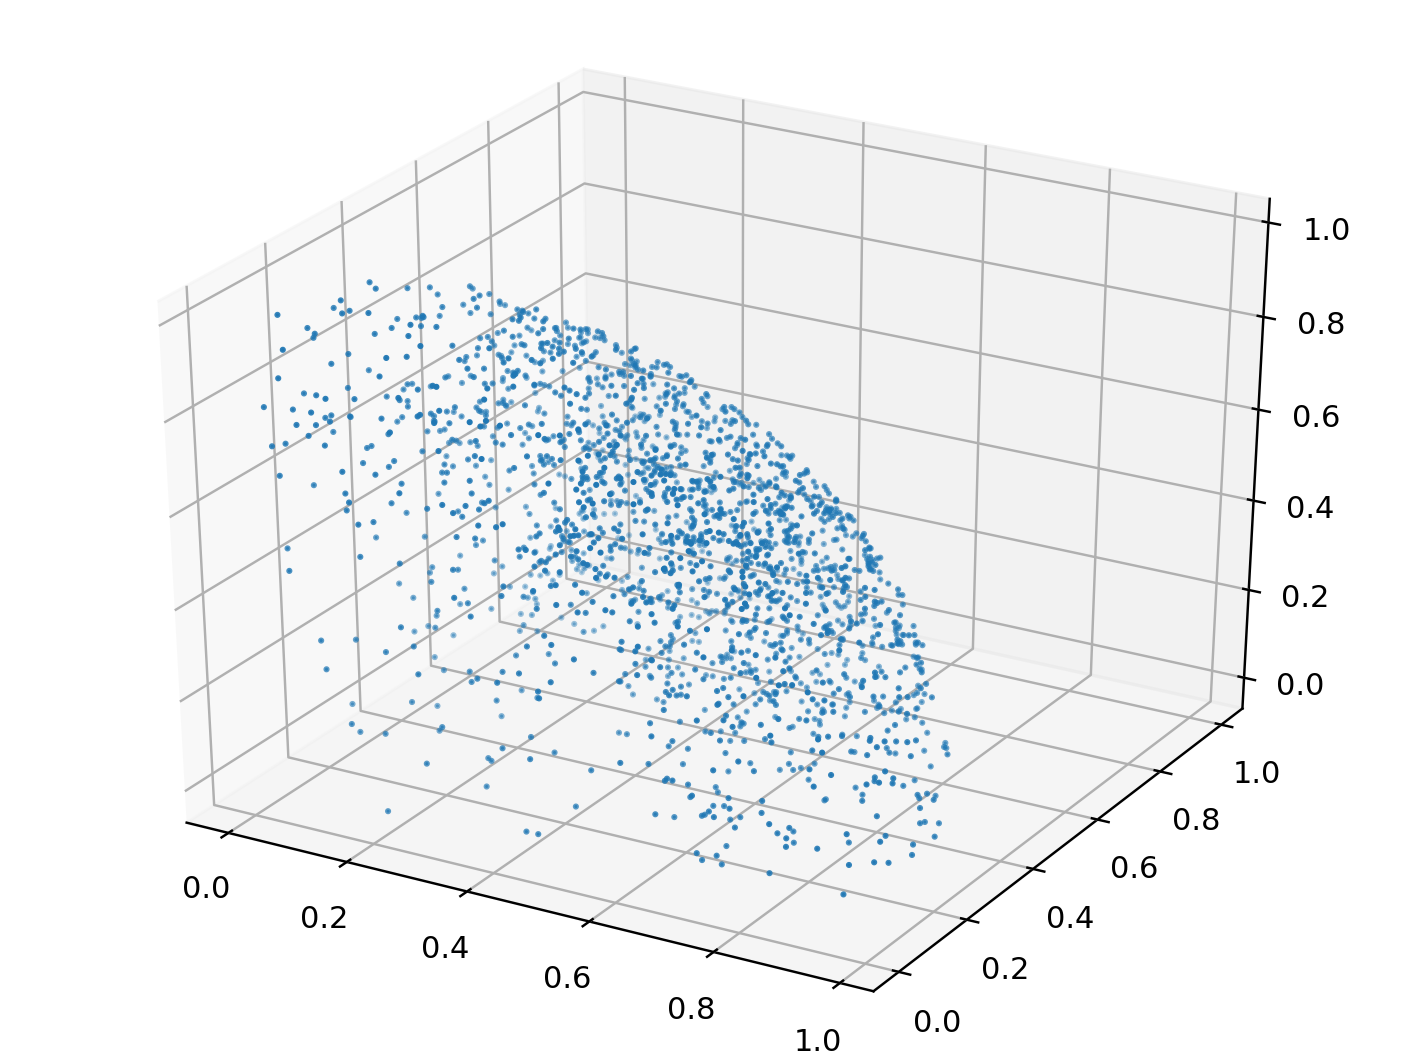

In [7]:
dim = '4d'
# fullpathf = "../data/dtlz2-nbi/{0:s}/dataf.csv".format(dim)
fullpathf = "../data/dtlz2/{0:s}/dataf.csv".format(dim)
# fullpathf = "../data/debmdk-all-nbi/{0:s}/dataf.csv".format(dim)
# fullpathf = "../data/debmdk-all/{0:s}/dataf.csv".format(dim)
# fullpathf = "../data/dtlz8-nbi/{0:s}/dataf.csv".format(dim)
# fullpathf = "../data/dtlz8/{0:s}/dataf.csv".format(dim)

path, filenamef = os.path.split(fullpathf)
dirs = path.split('/')
frontname = dirs[-2]

F = np.loadtxt(fullpathf, delimiter = ',')

# Plot
if dim == "2d":
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(F[:,0], F[:,1], s = 1)
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(F[:,0], F[:,1], F[:,2], s = 1)
    plt.show()

### Project and collapse data points

In some cases, it might be useful to project the data points onto M-1 dimensional simplex and then collapse one dimension. But this depends on how a user might want to visualize the data-set.

<IPython.core.display.Javascript object>


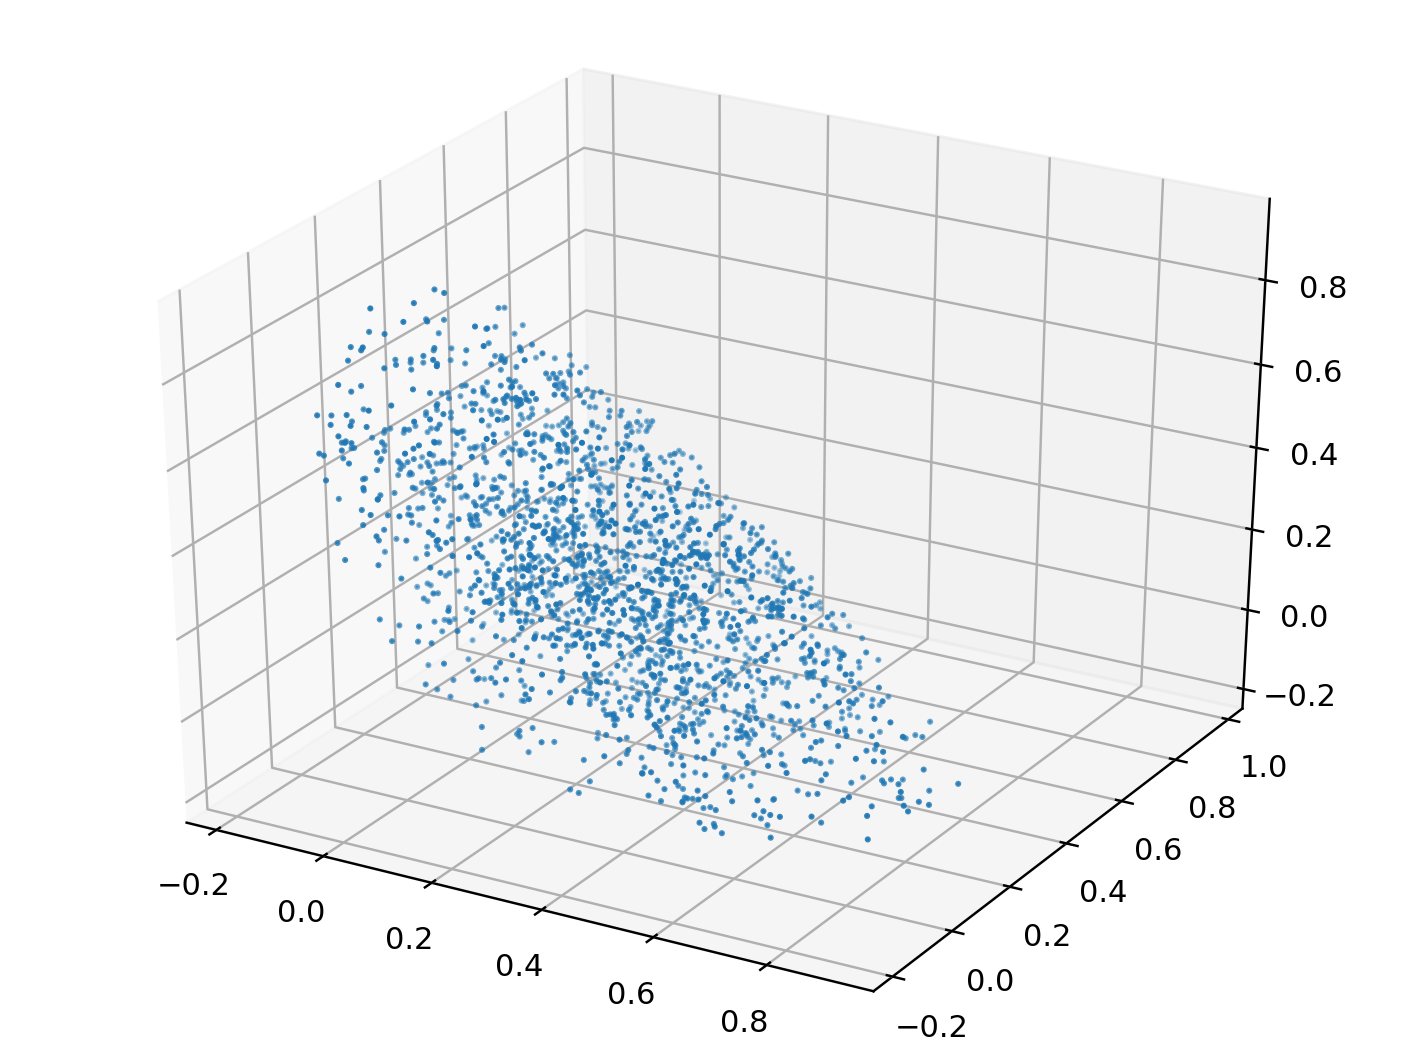

In [8]:
sys.path.append('../src')
from tda import simple_shape as ss

if F.shape[1] >= 3:
    F_ = ss.project(F)
    P = ss.collapse(F_, d = F.shape[1]-1)
else:
    P = ss.project(F)

# Plot
if P.shape[1] == 2:
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(P[:,0], P[:,1], s = 1)
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(P[:,0], P[:,1], P[:,2], s = 1)
    plt.show()

### Test with a simple convex-hull

(308, 3)
(156,)


<IPython.core.display.Javascript object>


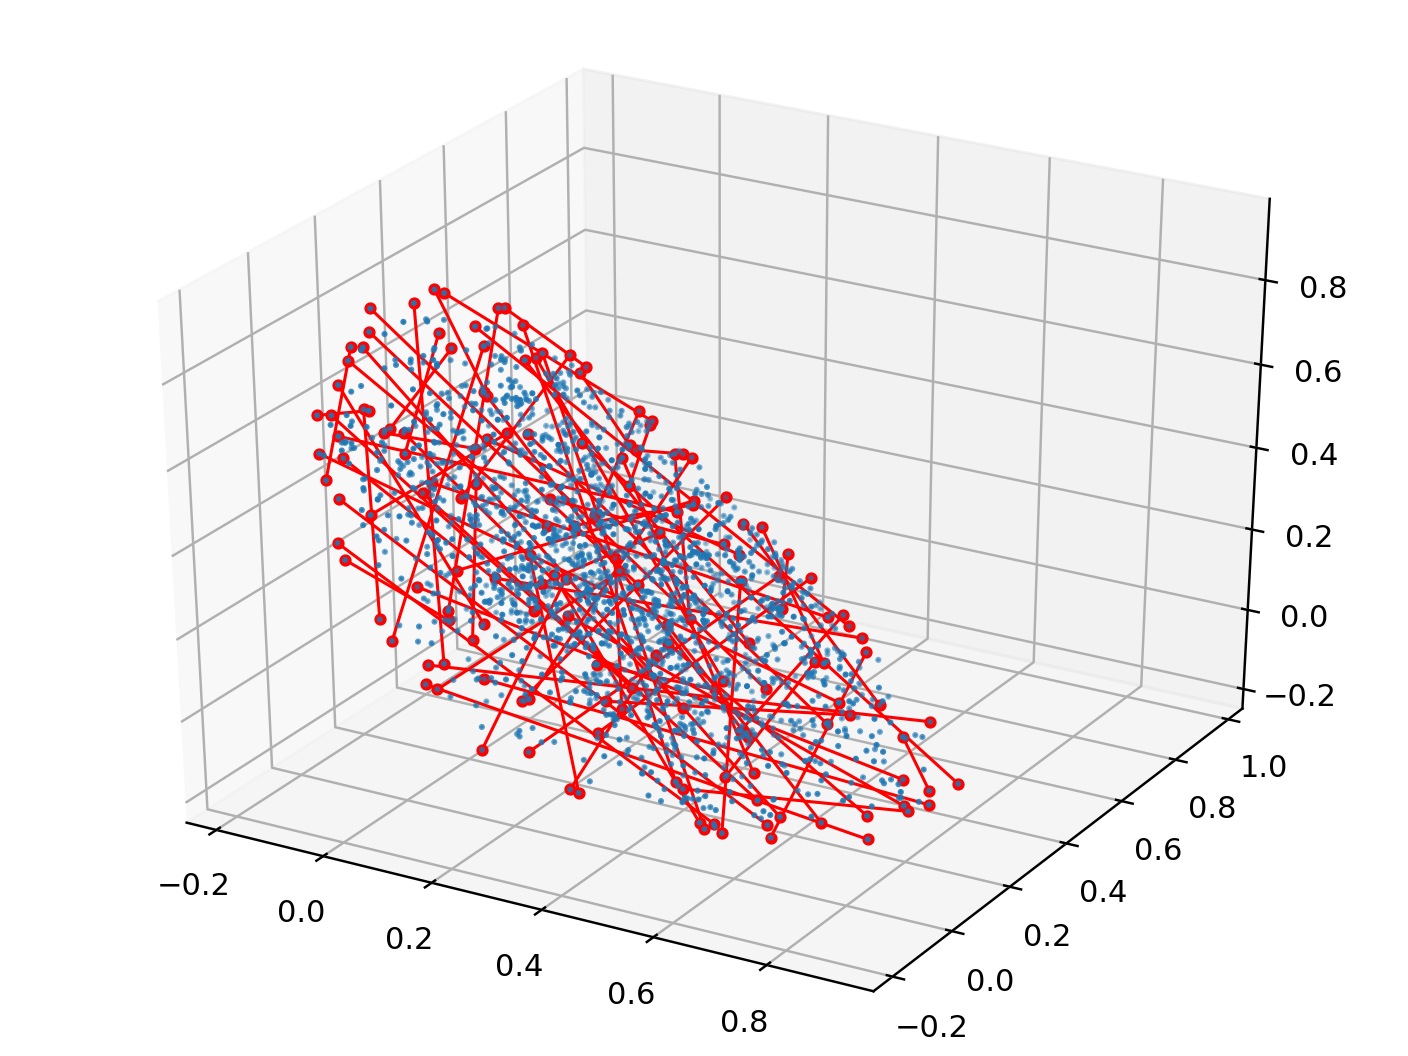

In [9]:
from scipy.spatial import ConvexHull

N,M = F.shape
Ch = ConvexHull(P, qhull_options = "Qa QJ Q12")

print(Ch.simplices.shape)
print(Ch.vertices.shape)

H = P[Ch.vertices]

# Plot
K = H.shape[0] if H.shape[0] % 2 == 0 else H.shape[0]-1
if P.shape[1] == 2:
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(P[:,0], P[:,1], s = 1)
    for i in range(0, K, 2):
        ax.plot([H[i,0], H[i+1,0]], [H[i,1], H[i+1,1]], \
                 marker = 'o', color = 'red', ms = 3, lw = 1)
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(P[:,0], P[:,1], P[:,2], s = 1)
    for i in range(0, K, 2):
        ax.plot([H[i,0], H[i+1,0]], [H[i,1], H[i+1,1]], \
                 zs = [H[i,2], H[i+1,2]], \
                 marker = 'o', color = 'red', ms = 3, lw = 1)
    plt.show()

### Test with a simple convex-hull based depth-contour algorithm

First find the depth-contours from a simpel convex-hull with projection and collapse.

<IPython.core.display.Javascript object>


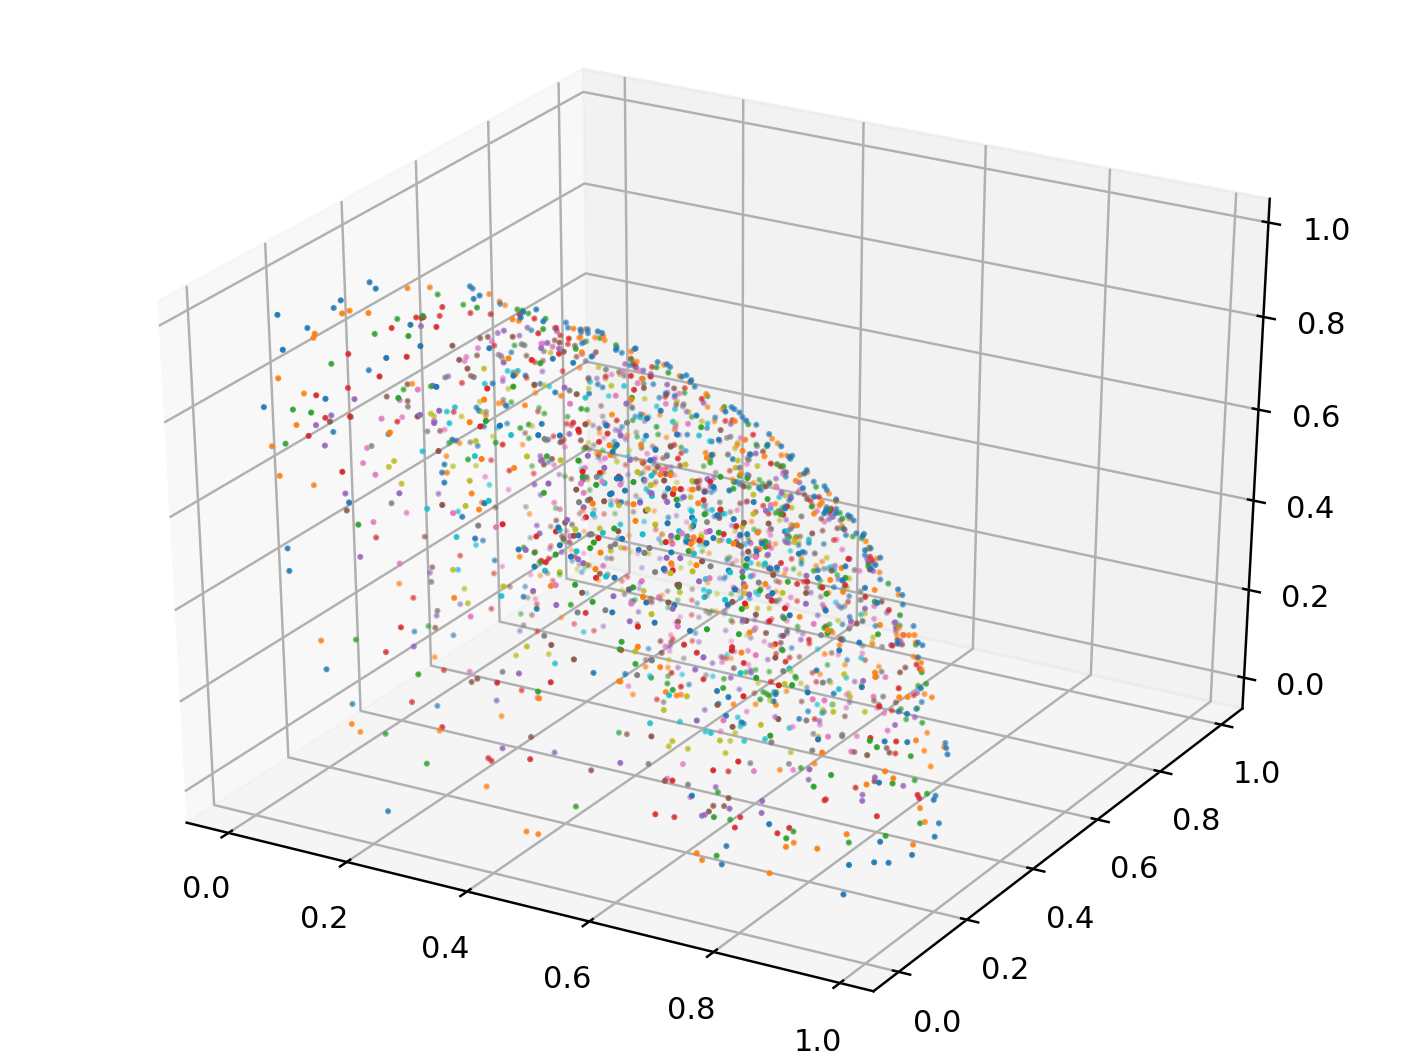

In [10]:
sys.path.append('../src')
from tda import simple_shape as ss
from utils import io

# test simple_shape.depth_contour function
L = ss.depth_contours(F)
# save the layers to /tmp/test.csv
io.savetxt("/tmp/test.csv", L, fmt = '{:d}', delimiter = ',')
# load it again
L = io.loadtxt("/tmp/test.csv", dtype = int, delimiter = ',')

# plot each layer of the original data points with different colors 
X = F # P
if X.shape[1] == 2:
    fig = plt.figure()
    ax = fig.gca()
    for l in L:
        ax.scatter(X[l,0], X[l,1], s = 1)
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    for l in L:
        ax.scatter(X[l,0], X[l,1], X[l,2], s = 1)
    plt.show()

### Test with a simple convex-hull based depth-contour algorithm (no projection and collapse)

Then find the depth-contours from a simpel convex-hull without projection and collapse.

<IPython.core.display.Javascript object>


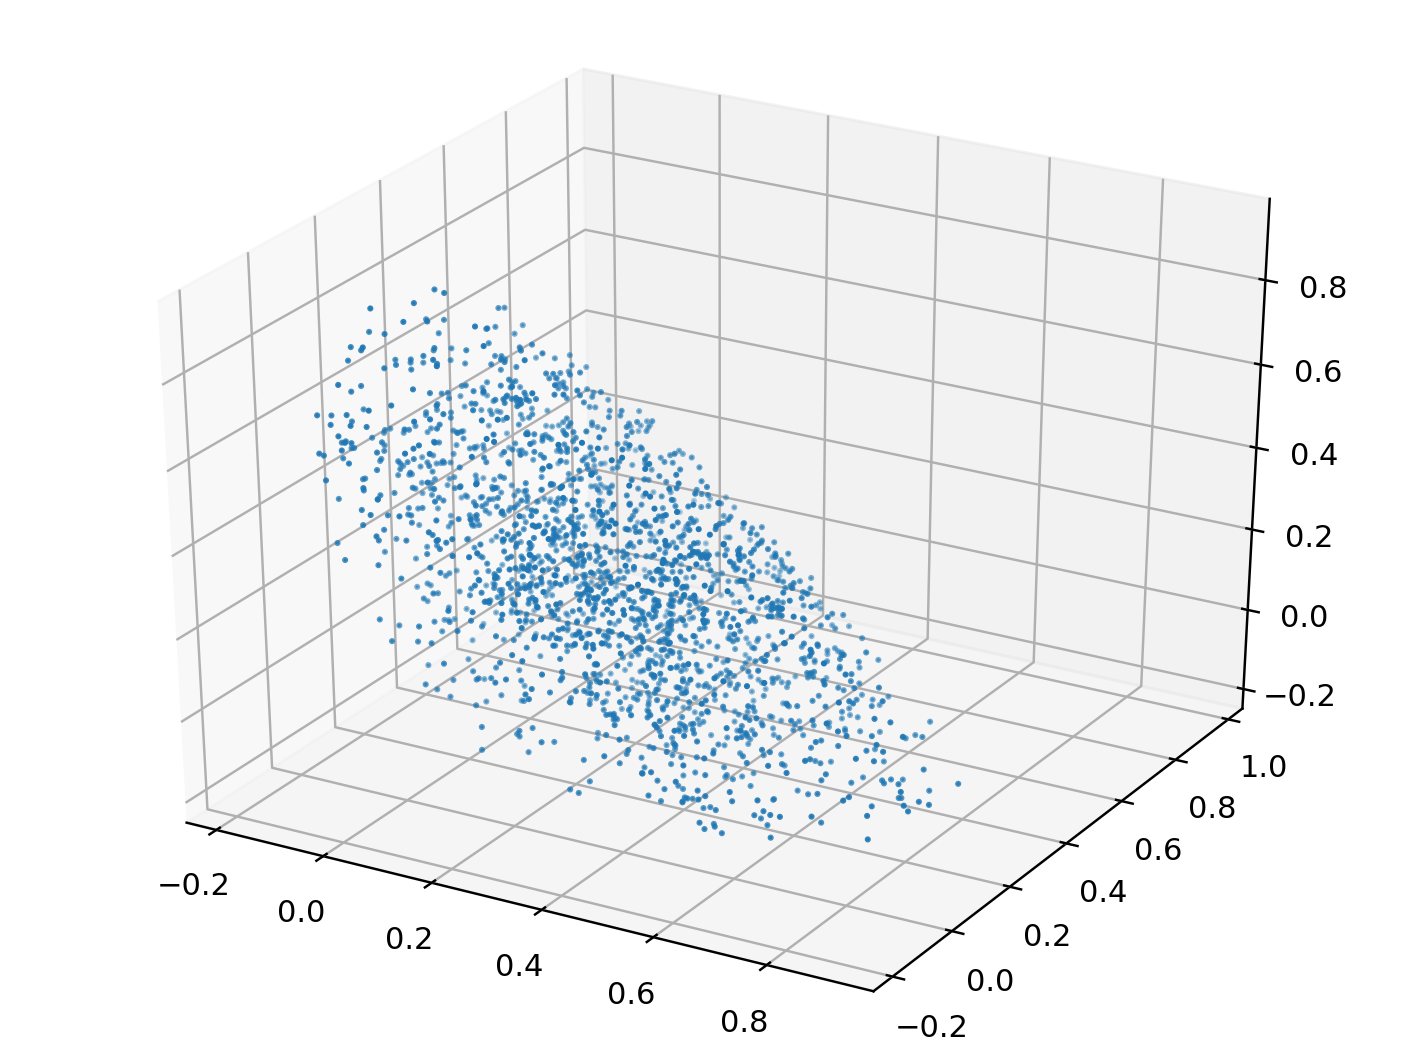

In [11]:
# test simple_shape.depth_contour without any projection and collapse
# NOTE: this can be extremely slow for many points in high-dimension, also
# going to give just one layer of depth contour if all the points are on a 
# convex surface.
L = ss.depth_contours(F, project_collapse = False)
# save the layers to /tmp/test.csv
io.savetxt("/tmp/test-no-collapse.csv", L, fmt = '{:d}', delimiter = ',')
# load it again
L = io.loadtxt("/tmp/test-no-collapse.csv", dtype = int, delimiter = ',')

# plot each layer of the original data points with different colors 
X = P # F
if X.shape[1] == 2:
    fig = plt.figure()
    ax = fig.gca()
    for l in L:
        ax.scatter(X[l,0], X[l,1], s = 1)
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    for l in L:
        ax.scatter(X[l,0], X[l,1], X[l,2], s = 1)
    plt.show()